<img src="https://www.learntek.org/wp-content/uploads/2017/10/Machine-Learning-Using-Python.png" img>

<div class="alert alert-block alert-success">
    <h1 align="center"> Machine Learning Course </h1>
    <h4 align="center"><a href="https://github.com/AtashfarazNavid/">Navid's Github link</a></h5>
    <h4 align="center"><a href="https://www.linkedin.com/in/navidatashfaraz/">Navid's LinkedIn </a></h5>
</div>

## **import Lib**

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#imports datasets from scikit-learn
import sklearn
from sklearn import datasets 
#loads Boston dataset from datasets library 
from sklearn.datasets import load_boston
boston = load_boston() 

## **Boston House Dataset**
The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with boston housing data, we will be using scikit-learn’s boston dataset.

## **Load And EDA Data**

In [4]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# Initializing the dataframe
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [7]:
# See head of the dataset
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
data.shape

(506, 13)

In [9]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
#Check the shape of dataframe
data.shape

(506, 14)

In [12]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [13]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

## **Handling Missing Data**

In [14]:
# Check for missing values
data.isnull().sum() 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [19]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<img src="https://www.datadeck.com/en/blog/wp-content/uploads/2018/11/cor-examples.png" />

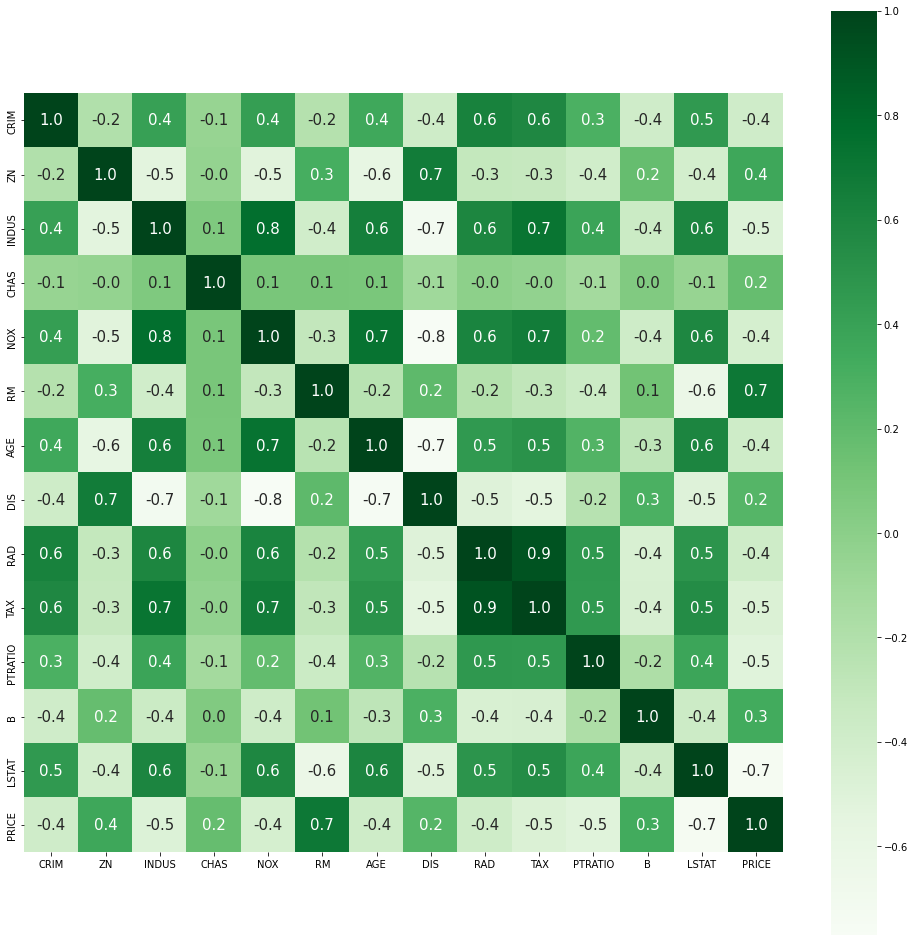

In [22]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(17,17))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Simple Linear Regression (SLR)

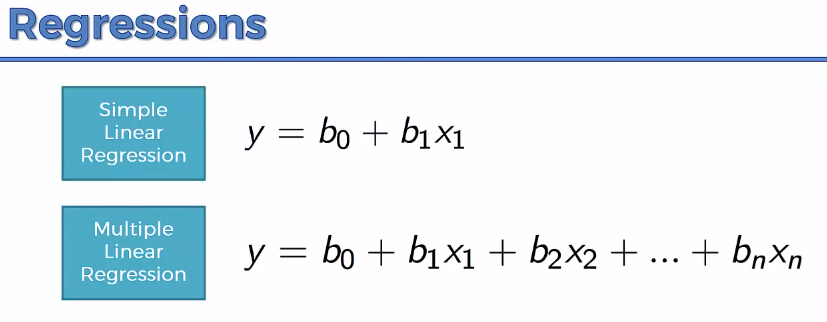

In [15]:
X = data[['RM']]
y = data['PRICE']

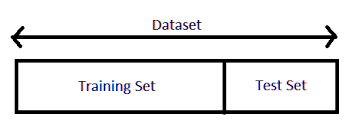

In [16]:
# Splitting to training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [17]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
SLR = LinearRegression()

# Train the model using the training sets 
SLR.fit(X_train, y_train)

LinearRegression()

In [18]:
SLR.intercept_ #b0

-30.93053441783967

In [19]:
SLR.coef_ #b1

array([8.4697365])

## Model (SLR) Evaluation

In [22]:
from sklearn import metrics

# Model prediction on train data
y_pred = SLR.predict(X_test)

In [24]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.5772885889437522
MAE: 4.41677554787001
MSE: 39.91873874699694
RMSE: 6.31812778811864


## Multiple Linear Regression (MLR)

In [25]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE'] 

In [26]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [27]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41
301,0.03537,34.0,6.09,0.0,0.433,6.590,40.4,5.4917,7.0,329.0,16.1,395.75,9.50
60,0.14932,25.0,5.13,0.0,0.453,5.741,66.2,7.2254,8.0,284.0,19.7,395.11,13.15
205,0.13642,0.0,10.59,0.0,0.489,5.891,22.3,3.9454,4.0,277.0,18.6,396.90,10.87
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10
393,8.64476,0.0,18.10,0.0,0.693,6.193,92.6,1.7912,24.0,666.0,20.2,396.90,15.17
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66


In [28]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
mlr = LinearRegression()

# Train the model using the training sets 
mlr.fit(X_train, y_train)

LinearRegression()

In [29]:
mlr.intercept_ #b0

41.50194420886384

In [30]:
mlr.coef_ #for ALL b

array([-1.07785696e-01,  5.66077499e-02, -1.93712500e-02,  1.58089387e+00,
       -1.56336824e+01,  2.99946099e+00,  1.11196144e-02, -1.53659770e+00,
        3.43367507e-01, -1.27773761e-02, -9.23375768e-01,  8.81779660e-03,
       -6.77288002e-01])

## Model(MLR) Evaluation

In [31]:
# Model prediction on train data
y_pred = mlr.predict(X_test)

In [32]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.7149688998304093
MAE: 3.4938804054219417
MSE: 23.25090458077211
RMSE: 4.8219191802405925
